# k-Mean Clustering

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression


In this notebook we practice k-means clustering with 2 examples:
- k-means on a random generated dataset
- Using k-means for customer segmentation


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## k-Means on a randomly generated dataset

First we need to set a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>.


In [3]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [4]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2,-1], [2,-3], [1,1]], cluster_std=0.9)

In [5]:
X.ndim, y.ndim

(2, 1)

In [6]:
X.shape, y.shape

((5000, 2), (5000,))

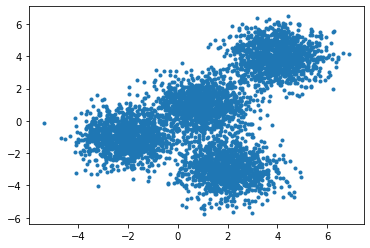

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

## Setting up k-Means

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [8]:
from sklearn.cluster import KMeans 
k_means = KMeans(init='k-means++', n_clusters = 4, n_init=12)

In [9]:
k_means.fit(X, y)

KMeans(n_clusters=4, n_init=12)

In [10]:
X.shape, y.shape

((5000, 2), (5000,))

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b>.


In [11]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster&#95;centers&#95; </b> and save it as <b> k_means_cluster_centers </b>.


In [12]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

## Creating the Visual Plot

In [13]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

<Figure size 432x288 with 0 Axes>

In [14]:
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [15]:
set(k_means_labels)

{0, 1, 2, 3}

In [16]:
len(set(k_means_labels))

4

In [17]:
hal_color = np.linspace(0,1,4)
hal_color

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [18]:
plt.cm.Spectral(hal_color)

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [19]:
'''Colors uses a color map, which will produce an array of colors based on 
the number of labels there are. We use set(k_means_labels) to get the
unique labels.
'''
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

In [20]:
# Create a plot
ax = fig.add_subplot(1, 1, 1)

### Manual looping

In [21]:
hal_list = [[4,4], [-2, -1], [2, -3], [1, 1]]
hal_list

[[4, 4], [-2, -1], [2, -3], [1, 1]]

In [22]:
type(hal_list)

list

In [23]:
# number of list in the created list
len(hal_list)

4

In [24]:
range(4), colors

(range(0, 4),
 array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
        [0.99346405, 0.74771242, 0.43529412, 1.        ],
        [0.74771242, 0.89803922, 0.62745098, 1.        ],
        [0.36862745, 0.30980392, 0.63529412, 1.        ]]))

In [25]:
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    print(k, col)

0 [0.61960784 0.00392157 0.25882353 1.        ]
1 [0.99346405 0.74771242 0.43529412 1.        ]
2 [0.74771242 0.89803922 0.62745098 1.        ]
3 [0.36862745 0.30980392 0.63529412 1.        ]


In [26]:
# Get index of data points which are included in clusters 0 and create a list
k, col = 0, [0.61960784, 0.00392157, 0.25882353, 1.        ]
my_members = (k_means_labels == k)
my_members

array([ True, False, False, ..., False,  True,  True])

In [27]:
# Define the centroid, or cluster center of cluster 0
cluster_center = k_means_cluster_centers[k]
cluster_center

array([-2.03743147, -0.99782524])

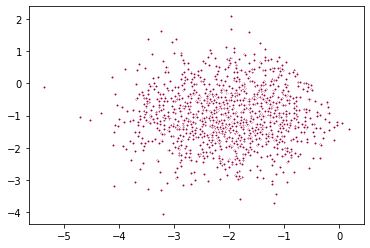

In [28]:
# Plots the datapoints with color col.
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
plt.show()

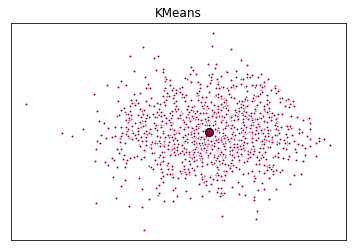

In [29]:
# Plots the centroids with specified color, but with a darker outline
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=8)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

plt.show()

### Wih For loop

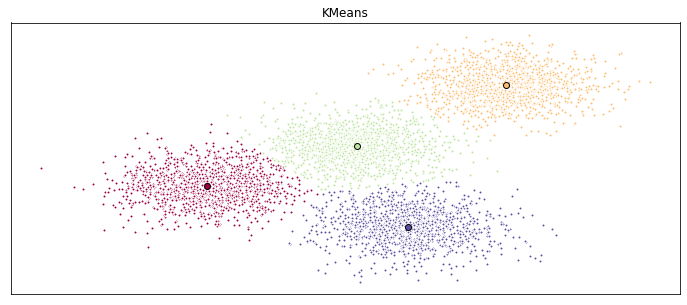

In [30]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 5))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Practice
Try to cluster the above dataset into 3 clusters.  
Notice: do not generate the data again, use the same dataset as above.


In [31]:
from sklearn.cluster import KMeans
k1_means = KMeans(init='k-means++', n_clusters=3, n_init=12)

In [32]:
k1_means.fit(X)

KMeans(n_clusters=3, n_init=12)

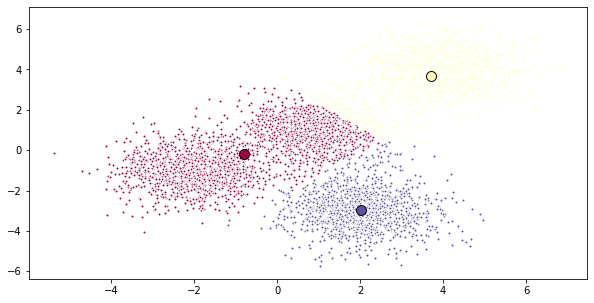

In [33]:
fig = plt.figure(figsize=(10,5))
colors = plt.cm.Spectral(np.linspace(0,1,3))
ax = fig.add_subplot(1,1,1)
for k, col in zip(range(3), colors):
    my_members = (k1_means.labels_ == k)
    cluster_center = k1_means.cluster_centers_[k]
    ax.plot(X[my_members,0], X[my_members,1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k',
           markersize=10)
plt.show()

## Customer Segmentation with K-Means

<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.

__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


In [34]:
file = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv'

In [35]:
import pandas as pd
cust_df = pd.read_csv(file)
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing

As you can see, __Address__ in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.


In [36]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
# 1st 5 values of column number 1 --> 'Age' column
df.values[:5,1] # same with 'df.iloc[:5, 1].values'

array([41., 47., 33., 29., 47.])

In [39]:
X = df.values[:,1:] # Taking columns from 'Age' to all

In [40]:
X.shape
# Total number of data is 6800

(850, 8)

__Test functions__

In [41]:
# Checking numbers of 'NaN values, Checking numbers of values
np.count_nonzero(np.isnan(X)), np.count_nonzero(~np.isnan(X))
# Space ပါနေတာစုစုပေါင်း 150 ရှိတယ်, မပါတာက 6650 ရှိတယ်
# Total number of data is 6800

(150, 6650)

In [42]:
np.count_nonzero(X == 0)

589

In [43]:
hal = np.array([[1,2], [3,4], [5, np.nan], [7, np.nan]])
print('Before:\n',hal)
hal1 = np.nan_to_num(hal) # Replace NaN with zero
print('After:\n',hal1)

Before:
 [[ 1.  2.]
 [ 3.  4.]
 [ 5. nan]
 [ 7. nan]]
After:
 [[1. 2.]
 [3. 4.]
 [5. 0.]
 [7. 0.]]


__Back to main coding__

In [44]:
X = np.nan_to_num(X)

In [45]:
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Modeling

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take a look at cluster labels.


In [46]:
clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

In [47]:
labels.shape

(850,)

<h3 id="insights">Insights</h3>

We assign the labels to each row in the dataframe.


In [48]:
df['Clus_km'] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.


In [49]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


Now, let's look at the distribution of customers based on their age and income:


In [50]:
X[:2, :]

array([[ 41.   ,   2.   ,   6.   ,  19.   ,   0.124,   1.073,   0.   ,
          6.3  ],
       [ 47.   ,   1.   ,  26.   , 100.   ,   4.582,   8.218,   0.   ,
         12.8  ]])

In [51]:
area = np.pi * (X[:,1])**2

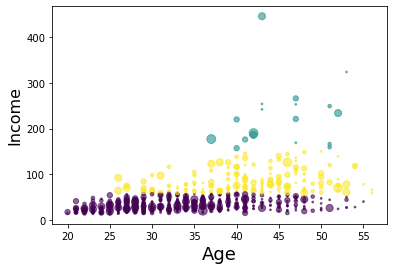

In [52]:
# Plot based on 'Age' Vs 'Income'
# Size = used upon 'Education'
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.6)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [53]:
from mpl_toolkits.mplot3d import Axes3D 

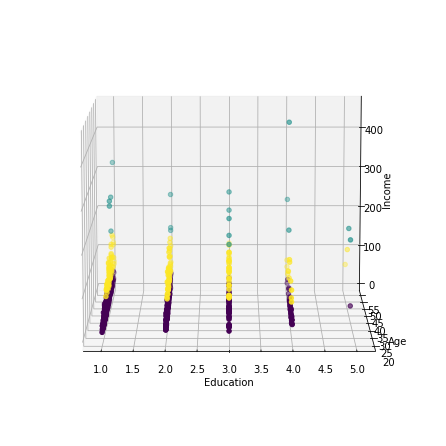

In [61]:
fig = plt.figure(1, figsize=(8, 6))
# clear current figure
plt.clf()
ax = Axes3D(fig, rect=[0,0,.95,1], elev=10, azim=270)
# Clear current axes
plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
# Plot based on 'Edu' vs 'Age' Vs 'Income'
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME
